In [86]:
import pandas as pd
cars=pd.read_csv("cleaned_german_cars_data.csv")
cars

,Unnamed: 0,name,price,description,trassmition,model,milage,fuel,Brand,Segment
0,0,Seat Leon,26118,Sportstourer 1.4 E-hybrid Fr Led Acc Navi,Automatic,2021,52080,Hybrid,Seat,Low-Range
1,1,Volvo V60,27777,T6 Awd Recharge Plug-in Momentum Pro Ahk,Automatic,2020,107217,Hybrid,Volvo,Premium
2,2,Volkswagen Tiguan,20392,"2.0 Tdi Navi/sound/bmt,comfortline,1.hand",Manual,2017,123000,Diesel,Volkswagen,Premium
3,3,Volkswagen Tiguan,30967,2.0 Tdi Highline R-line 4mo. Led+navi+acc,Automatic,2019,68100,Diesel,Volkswagen,Premium
4,4,Volkswagen Tiguan,22892,Join Start-stopp 2hand Ahk Garantie,Manual,2018,105958,Diesel,Volkswagen,Premium
...,...,...,...,...,...,...,...,...,...,...
8965,8965,Porsche Cayenne,95691,E-hybrid,Automatic,2022,14800,Hybrid,Porsche,Ultra-Luxury/Exotic
8966,8966,Porsche Cayenne,47533,Diesel / Sportdesign / Voll / 1.hd.,Automatic,2016,99870,Diesel,Porsche,Ultra-Luxury/Exotic
8967,8967,Porsche Cayenne,84648,Coupe E-hybrid*head-up*360°cam*panorama*,Automatic,2021,36500,Hybrid,Porsche,Ultra-Luxury/Exotic
8968,8968,Porsche 718,95657,"Gts 4.0 2023 .6 Gang 1.hand,bose",Manual,2023,6500,Petrol,Porsche,Ultra-Luxury/Exotic


In [87]:
cars.isnull().sum()
#check for missing value

Unnamed: 0      0
name            0
price           0
description    27
trassmition     0
model           0
milage          0
fuel            0
Brand           0
Segment         0
dtype: int64

In [88]:
cars=cars.dropna()
#drop empty cells

In [89]:
cars.duplicated().sum()
#check for duplicate

0

In [90]:
cars.dtypes
#check datatype

Unnamed: 0      int64
name           object
price           int64
description    object
trassmition    object
model           int64
milage          int64
fuel           object
Brand          object
Segment        object
dtype: object

In [91]:
cars.columns
#list column names

Index(['Unnamed: 0', 'name', 'price', 'description', 'trassmition', 'model',
       'milage', 'fuel', 'Brand', 'Segment'],
      dtype='object')

In [92]:
cars.nunique()
#view the number of unique values per column

Unnamed: 0     8943
name            392
price          5726
description    7195
trassmition       2
model            11
milage         4306
fuel              7
Brand            52
Segment           6
dtype: int64

In [93]:
del cars["Unnamed: 0"]
#drop s/n column

In [94]:
del cars["name"]
#drop the name column

In [95]:
cars.duplicated().sum()
#recheck for duplicate

1006

In [96]:
cars=cars.drop_duplicates(keep="first")
#drop duplicate but keep the first occurrence

In [97]:
cars.rename(columns={"trassmition":"transmission"}, inplace=True)
#renamed trassmition column to transmission
import warnings
warnings.filterwarnings("ignore")
#import warnings

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt
#import seaborn and pyplot

In [99]:
cars["transmission"].value_counts()
#count the number of automatic and manual cars

transmission
Automatic    5889
Manual       2048
Name: count, dtype: int64

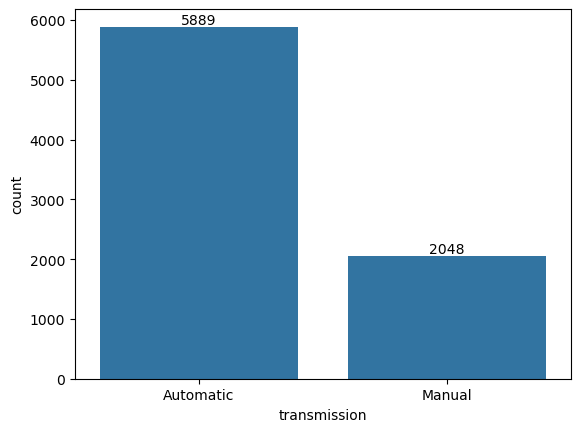

In [100]:
save = sns.countplot(x="transmission",data=cars)
for a in save.containers:
    save.bar_label(a)
#bar chart showing the distribution of automatic and manual car

In [101]:
used_cars = cars.loc[(cars['model'] == 2024) & (cars['milage'] > 100)]
used_cars
#rows of used cars in 2024 i.e mileage > 100

,price,description,transmission,model,milage,fuel,Brand,Segment
7,38297,R-line Pano Kam Navi Iq-light 19'' Black,Automatic,2024,6123,Petrol,Volkswagen,Premium
18,95137,"S*acc,ahk,bose,pano,tempolim.,14-wege,360°",Automatic,2024,14300,Petrol,Porsche,Ultra-Luxury/Exotic
20,34797,Pure Tech Gt Eat *7-sitze*acc*led*upe:49,Automatic,2024,8231,Petrol,Peugeot,Mid-Range
78,60937,Sportback 2xs-line Pano Ahk360° Kamera,Automatic,2024,7130,Petrol,Audi,Luxury
88,74427,"Avant 40 Tdi Quattro Edition One Lp: 82.515,-",Automatic,2024,4000,Diesel,Audi,Luxury
...,...,...,...,...,...,...,...,...
8898,24547,Style 1.0 Tsi Dsg Lm Led W-paket Navi,Automatic,2024,9986,Petrol,Seat,Low-Range
8923,50417,Techno 220 Long Range,Automatic,2024,800,Not specified,Renault,Unknown
8924,47704,E-tech Esprit Alpine 220 Aktion Gewerbe*,Manual,2024,2500,Not specified,Renault,Unknown
8925,51704,E-tech Esprit Alpine 220 Long Range,Manual,2024,2500,Not specified,Renault,Unknown


In [102]:
cars.loc[cars["Brand"]=="Seat"]
#view rows where the Brand is seat

,price,description,transmission,model,milage,fuel,Brand,Segment
0,26118,Sportstourer 1.4 E-hybrid Fr Led Acc Navi,Automatic,2021,52080,Hybrid,Seat,Low-Range
1008,43768,Fr 2.0 Tdi 150 Dsg Nav Shz Kessy Ehk ...,Automatic,2024,10,Diesel,Seat,Low-Range
1009,19904,"St ""fr""_climatr_sitzh_led_sw_abstandstemp..",Manual,2019,42500,Petrol,Seat,Low-Range
1010,36682,Style 1.5 Tsi 150 Dsg Led Nav Kam Pdc...,Automatic,2024,10,Petrol,Seat,Low-Range
1011,13802,75ps Chic 4-tur Klima+sihzg+pdc+hu7/26+alu+t,Manual,2019,28850,Petrol,Seat,Low-Range
...,...,...,...,...,...,...,...,...
8896,26197,Fr 1.5 Tsi Opf*automatik*ruckfahrkamera...,Automatic,2024,16400,Petrol,Seat,Low-Range
8897,19071,1.0 Tsi Fr Digital-tacho R.kamera Keyless,Manual,2019,57000,Petrol,Seat,Low-Range
8898,24547,Style 1.0 Tsi Dsg Lm Led W-paket Navi,Automatic,2024,9986,Petrol,Seat,Low-Range
8899,27822,2.0 Tdi **ahk*xenon*acc*shz*pdc*bt**,Manual,2019,100000,Diesel,Seat,Low-Range


In [103]:
cars = cars.loc[cars["Brand"] != "Seat"]
#drop rows where brand is seat by reassigning columns where brand is not seat

In [104]:
cars

,price,description,transmission,model,milage,fuel,Brand,Segment
1,27777,T6 Awd Recharge Plug-in Momentum Pro Ahk,Automatic,2020,107217,Hybrid,Volvo,Premium
2,20392,"2.0 Tdi Navi/sound/bmt,comfortline,1.hand",Manual,2017,123000,Diesel,Volkswagen,Premium
3,30967,2.0 Tdi Highline R-line 4mo. Led+navi+acc,Automatic,2019,68100,Diesel,Volkswagen,Premium
4,22892,Join Start-stopp 2hand Ahk Garantie,Manual,2018,105958,Diesel,Volkswagen,Premium
5,26760,2.0 Tdi/matrix/4motion/ambiente/200ps,Automatic,2021,127000,Diesel,Volkswagen,Premium
...,...,...,...,...,...,...,...,...
8965,95691,E-hybrid,Automatic,2022,14800,Hybrid,Porsche,Ultra-Luxury/Exotic
8966,47533,Diesel / Sportdesign / Voll / 1.hd.,Automatic,2016,99870,Diesel,Porsche,Ultra-Luxury/Exotic
8967,84648,Coupe E-hybrid*head-up*360°cam*panorama*,Automatic,2021,36500,Hybrid,Porsche,Ultra-Luxury/Exotic
8968,95657,"Gts 4.0 2023 .6 Gang 1.hand,bose",Manual,2023,6500,Petrol,Porsche,Ultra-Luxury/Exotic


In [105]:
cars.loc[cars["model"]==2024].groupby("Brand")[["price"]].sum().sort_values("price", ascending=False).head(1)
#brand with the highest total price in 2024

,price
Brand,
Volkswagen,23547924


In [106]:
cars["Brand"].nunique()
#count of unique brands of cars

51

In [107]:
cars["Brand"].unique()
#the different unique brands of cars

array(['Volvo', 'Volkswagen', 'Toyota', 'Renault', 'Porsche', 'Peugeot',
       'Mini', 'Mercedes-benz', 'Hyundai', 'Fiat', 'Dacia', 'Citroen',
       'Bmw', 'Audi', 'Nissan', 'Land', 'Suzuki', 'Smart', 'Tesla',
       'Skoda', 'Ssangyong', 'Opel', 'Mitsubishi', 'Mazda', 'Maserati',
       'Lotus', 'Lexus', 'Lamborghini', 'Kia', 'Jeep', 'Jaguar', 'Honda',
       'Ford', 'Ferrari', 'Ds', 'Dodge', 'Cupra', 'Chevrolet', 'Cadillac',
       'Bentley', 'Aston', 'Alpina', 'Alfa', 'Abarth', 'Rolls-royce',
       'Polestar', 'Morgan', 'Mg', 'Subaru', 'Mclaren', 'Lynk'],
      dtype=object)

In [108]:
cars.groupby("Brand")[["price"]].sum().sort_values("price", ascending=False).head(1)
#car brand with the highest total price

,price
Brand,
Volkswagen,54365163


In [109]:
!pip install plotly 
import plotly.express as px

In [110]:
cars["milage"].max()
#check for the highest mileage

150000

In [111]:
cars["milage"].min()
#check for the lowest mileage

0

In [112]:
def milage_class(x):
    if x <= 5000:
        return "0-5k"
    elif 5000 < x <= 20000:
        return "5k-20k"
    elif 20000 < x <= 50000:
        return "20k-50k"
    elif 50000 < x <= 100000:
        return "50k-100k"
    elif 100000 < x <= 150000:
        return "100k-150k"
    else:
        return "Above 150k" 
#assign milage class based on range

In [113]:
cars["milage"].apply(milage_class)
# Apply the mileage classification to the 'milage' column to assign each car to a mileage class

1       100k-150k
2       100k-150k
3        50k-100k
4       100k-150k
5       100k-150k
          ...    
8965       5k-20k
8966     50k-100k
8967      20k-50k
8968       5k-20k
8969     50k-100k
Name: milage, Length: 7784, dtype: object

In [114]:
cars.insert(5,"milage class",cars["milage"].apply(milage_class))
# Insert a new column 'milage class' to store the milage classification for each car
cars

,price,description,transmission,model,milage,milage class,fuel,Brand,Segment
1,27777,T6 Awd Recharge Plug-in Momentum Pro Ahk,Automatic,2020,107217,100k-150k,Hybrid,Volvo,Premium
2,20392,"2.0 Tdi Navi/sound/bmt,comfortline,1.hand",Manual,2017,123000,100k-150k,Diesel,Volkswagen,Premium
3,30967,2.0 Tdi Highline R-line 4mo. Led+navi+acc,Automatic,2019,68100,50k-100k,Diesel,Volkswagen,Premium
4,22892,Join Start-stopp 2hand Ahk Garantie,Manual,2018,105958,100k-150k,Diesel,Volkswagen,Premium
5,26760,2.0 Tdi/matrix/4motion/ambiente/200ps,Automatic,2021,127000,100k-150k,Diesel,Volkswagen,Premium
...,...,...,...,...,...,...,...,...,...
8965,95691,E-hybrid,Automatic,2022,14800,5k-20k,Hybrid,Porsche,Ultra-Luxury/Exotic
8966,47533,Diesel / Sportdesign / Voll / 1.hd.,Automatic,2016,99870,50k-100k,Diesel,Porsche,Ultra-Luxury/Exotic
8967,84648,Coupe E-hybrid*head-up*360°cam*panorama*,Automatic,2021,36500,20k-50k,Hybrid,Porsche,Ultra-Luxury/Exotic
8968,95657,"Gts 4.0 2023 .6 Gang 1.hand,bose",Manual,2023,6500,5k-20k,Petrol,Porsche,Ultra-Luxury/Exotic


In [115]:
distribution=cars.groupby("milage class").count().reset_index()
distribution
#count of cars under a milage class

,milage class,price,description,transmission,model,milage,fuel,Brand,Segment
0,0-5k,1707,1707,1707,1707,1707,1707,1707,1707
1,100k-150k,980,980,980,980,980,980,980,980
2,20k-50k,1749,1749,1749,1749,1749,1749,1749,1749
3,50k-100k,1923,1923,1923,1923,1923,1923,1923,1923
4,5k-20k,1425,1425,1425,1425,1425,1425,1425,1425


In [116]:
chart=px.bar(distribution,
             x='milage class',
             y=distribution.columns[2],
             title='Car Milage Distribution',
             labels={'milage class': 'Milage Class', distribution.columns[2]: 'Number of Cars'})
chart.show()
#bar chart showing the distribution of car milage across the milage classes

In [117]:
fuel_value=cars["fuel"].value_counts().reset_index()
fuel_value
#count of each value in the fuel column

,fuel,count
0,Petrol,4186
1,Diesel,2307
2,Hybrid,665
3,Electric,424
4,Not specified,167
5,Others,27
6,LPG,8


In [118]:
px.pie(fuel_value,names="fuel",values="count",title="Fuel Distribution")
#percentage distribution of each value in the 'fuel' column

In [119]:
cars.groupby('Segment')[['price']].sum().sort_values("price",ascending=False)
#total price of each segment

,price
Segment,
Luxury,99101509
Premium,74835174
Low-Range,44807440
Mid-Range,44729131
Ultra-Luxury/Exotic,16938169
Unknown,6720781
